# Hepatitis C Predictive Modelling

This notebook is aimed at exploring and modelling Hepatitis C Data obtained from kaggle: https://www.kaggle.com/fedesoriano/hepatitis-c-dataset 
        
In this project we will conduct
* Preliminary exploration of the data
* Cleaning and treatment
* Visualization to understand relationships
* Modelling and optimization of the predictive model

## Getting the Data Ready

In [16]:
#Import packages used for dataset
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score


In [17]:
#Load the dataset
hepatitis_data_set = pd.read_csv('HepatitisCdata.csv')

In [18]:
#find out about data set
print(hepatitis_data_set.dtypes, hepatitis_data_set.info(), hepatitis_data_set.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB
Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64

## Cleaning and Treatment of Data

In [19]:
# We are going to drop the rows with na values 
hepatitis_data_set.dropna(inplace=True)
# What do the rows look like
print(len(hepatitis_data_set.index), '\n',hepatitis_data_set.head())

589 
    Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  


In [20]:
#What kind of values are in the Category column
list(set(hepatitis_data_set['Category']))

['0=Blood Donor',
 '1=Hepatitis',
 '3=Cirrhosis',
 '0s=suspect Blood Donor',
 '2=Fibrosis']

In [21]:
# Though there are many categories, we are breaking it into binary: healthy and unhealthy.
hepatitis_data_set['Category'].loc[hepatitis_data_set['Category'].isin(["1=Hepatitis","2=Fibrosis", "3=Cirrhosis"])] = 1
hepatitis_data_set['Category'].loc[hepatitis_data_set['Category'].isin(["0=Blood Donor", "0s=suspect Blood Donor"])] = 0


C:\Users\fritz\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Visualizing the Data

In [22]:
column_titles = hepatitis_data_set.columns
hepatitis_data_set.columns[4:]
plotting_columns = hepatitis_data_set.columns[4:]

''

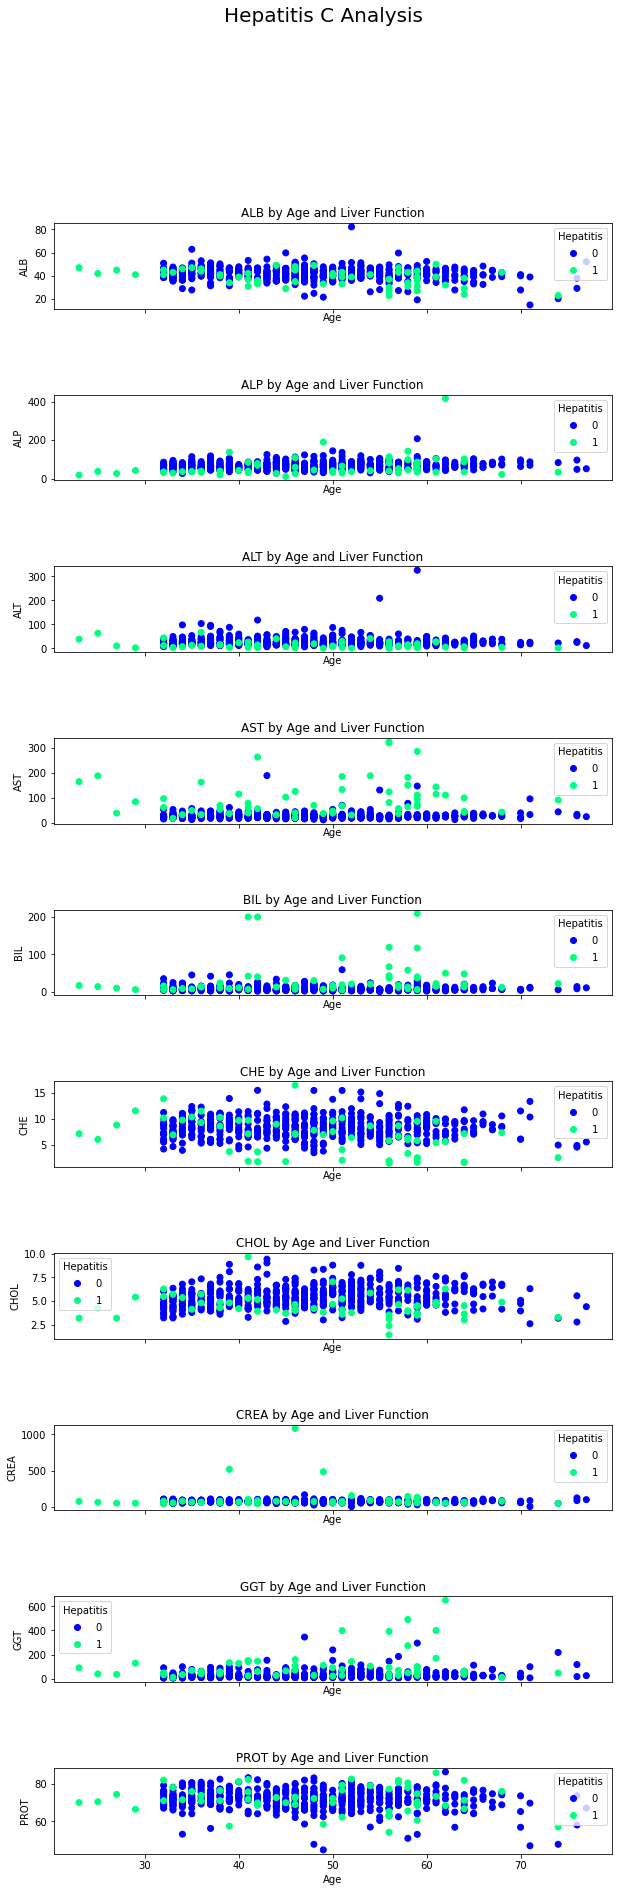

In [23]:
# Let's Create some visualizations for the data: We will create a plot for each variable as it relates to age
fig,ax= plt.subplots(nrows=len(plotting_columns),ncols=1,sharex=True, figsize=(10,30))
fig_data = hepatitis_data_set.copy()
X = hepatitis_data_set['Age']
for i in range(len(plotting_columns)):
    y = hepatitis_data_set[plotting_columns[i]]
    scatter = ax[i].scatter(x=X,y=y,c=hepatitis_data_set['Category'], cmap='winter')
    ax[i].set(title=f'{plotting_columns[i]} by Age and Liver Function', xlabel='Age', ylabel=plotting_columns[i])
    ax[i].legend(*scatter.legend_elements(), title='Hepatitis')
plt.subplots_adjust(hspace=1)
fig.suptitle('Hepatitis C Analysis', size=20)
plt.savefig('Hepatitis C Analysis.png',bbox_inches='tight')
;

## Plotting Conclusions

* The data can't be used for prediction for those under 33 years old.
    All individuals have Hepatitis C and the model used will likely put too much weight on this coincidence due to such strong correlation. As we will be using the k neighbor algorithm, the model would carve out that part of the graph as highly probable hepatitis territory. See an an example here https://ml-playground.com/#.
* Correlation is slight for any single factor: there is a high degree of overlap, although the two population do have visible trends: Higher AST levels and lower ALT for individuals with Hepatitis. This limits our certainty in the predictions the model provides. Even if it's predictions are successful withing this sample, we likely don't have a robust enough sample size for the trends to manifest clearly.

In [25]:
# To highligth the point lets consider again how many Hepatitis patients are in our data set.
hepatitis_data_set['Category'].loc[hepatitis_data_set['Category']==1].sum()

56

In [ ]:
# With only 56 data points with this classification, we lack enough data for normalization.

## Creating a Predictions Model 

In [26]:
# We also need to use numerical data for the sex column
hepatitis_data_set['Sex'].loc[hepatitis_data_set['Sex']=='m']=1
hepatitis_data_set['Sex'].loc[hepatitis_data_set['Sex']=='f']=0
#Check if the formatting is correct
data.head(),data.dtypes

(   Unnamed: 0 Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL  \
 0           1        0   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23   
 1           2        0   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   
 2           3        0   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   
 3           4        0   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   
 4           5        0   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   
 
     CREA   GGT  PROT  
 0  106.0  12.1  69.0  
 1   74.0  15.6  76.5  
 2   86.0  33.2  79.3  
 3   80.0  33.8  75.7  
 4   76.0  29.9  68.7  ,
 Unnamed: 0      int64
 Category       object
 Age             int64
 Sex            object
 ALB           float64
 ALP           float64
 ALT           float64
 AST           float64
 BIL           float64
 CHE           float64
 CHOL          float64
 CREA          float64
 GGT           float64
 PROT          float64
 dtype: object)

In [27]:
# Our category and sex columns are still object types. They need to be an integer data type
hepatitis_data_set['Sex']=hepatitis_data_set['Sex'].astype('int')
hepatitis_data_set['Category']=hepatitis_data_set['Category'].astype('int')

In [32]:
#Now we will split the data
from sklearn.model_selection import train_test_split
#Since the split is randomized, let's make it reproducible with numpy's random seed
np.random.seed(29)
# The X variable will be all fields except for liver condition.
X= hepatitis_data_set.drop('Category', axis=1)
# The Y variable will be a single liver condition column
y= hepatitis_data_set['Category']
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_preds = knn.predict(x_test)
accuracy_score(y_test,y_preds)

0.9830508474576272

## Testing and Validation

This Model seems to work incredibly well. It has a high amount of accuracy and consistency despite only a middling amount of data.

This isn't the most accurate way to test the model. Let's create some cross validation.

In [41]:
from sklearn.model_selection import cross_val_score
#We first need to shuffle the data, so that there are consistent cross validation sets.
np.random.seed(31)
shuffled_data = hepatitis_data_set.sample(frac=1)

#We can assign new cross validation variables
X2 = shuffled_data.drop('Category', axis=1)
y2 = shuffled_data['Category']

validation_scores = cross_val_score(knn, X2,y2,cv=5)
print(f'average score of cross validation sets: {np.mean(validation_scores)}')

average score of cross validation sets: 0.9949152542372882


Even with more rigorous testing parameters, the score is more likely to be perfect than not, which is impressive.

Normally, we would produce a classification report for data on which type of error is present, but without enough errors, it will be hard to get a conclusive sample.

Instead, our last analysis will be to investigate the models certainty in its predictions.

In [43]:
probability_predictions = knn.predict_proba(x_test)
probability_predictions
# This outputs the probability of the input being classifier 0  or 1

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. ,

In [56]:
# We can find out which predicion it is more certain of by running a simple average
negative_classifier_probability = np.mean([i for i in probability_predictions[:,0] if i > 0.5])
positive_classifier_probability = np.mean([i for i in probability_predictions[:,1] if i > 0.5])
negative_classifier_probability, positive_classifier_probability

(0.9980769230769231, 0.9142857142857144)

While it is good that the model showed high certainty for each label, the lower certainty for the second label, label 1, is cause for concern. If the model is less certain about the incidence of hepatitis C, we might assume it is more likely to deliver a false negative than a false positive, which would dangerous for patients. If this were the case, more individuals would be told that they do not have hepatitis C when they do. It would then go untreated and cause untold problems in the future. 

However this hypothesis may not be correct; while the model's certainty might reflect it's accuracy anectdotally, the model could also get proportionately more false positives due misguided confidence in the algorithm.

In order to check this hypothesis and make sure that the accuracy is a representative statistic of the model's success,  other metrics of the data need to be verified in a more comprehensive fashion.

In [57]:
# The cross validate function will show various metrics tested over every subset of the data set.
from sklearn.model_selection import cross_validate
cross_validation_scores = cross_validate(knn, X2, y2, cv=5,
                                        scoring=['accuracy','precision','recall','recall_macro'])
cross_validation_scores


{'fit_time': array([0.01562023, 0.        , 0.        , 0.01562572, 0.01562381]),
 'score_time': array([0.04426146, 0.01562572, 0.        , 0.        , 0.        ]),
 'test_accuracy': array([0.98305085, 1.        , 0.99152542, 1.        , 1.        ]),
 'test_precision': array([0.84615385, 1.        , 0.91666667, 1.        , 1.        ]),
 'test_recall': array([1., 1., 1., 1., 1.]),
 'test_recall_macro': array([0.99065421, 1.        , 0.9953271 , 1.        , 1.        ])}

In [59]:
np.std([0.98305085, 1.        , 0.99152542, 1.        , 1.        ])

0.006779660500000267

There are some anomalies in the precision scores of some validation sets, but every metric is consistently high.

The fact that recall is higher than precision on in the cross_validate test means that there our hypothesis was not correct in this specific test. The incidence of false negatives (0%) is much higher than the chance of false positives (5%). With only a 5% rate of false positives, the need for retesting would neither be often or costly, making this predictor efficient and safe for hospitals and patients. While this concludes our project, it is important to communicate the shortcomings of the model and the improvements possible.

To reiterate the conclusions above, this model does not have enough data points describing the liver function of young people. This makes it a weak analytical tool for analyzing the possibility of hepatitis C in people under 35. 

The model, at under 600 data points and only 56 with hepatitis or worse, could certainly be more robust. It is possible that a sample size as small as this is not representative of the population and extrapolation to the success of the model in the future should be tempered by this uncertainty.

And yet, our confidence interval is extremely slim using this testing method, and all signs point to the success of the model. We are ready to dump our model with joblib for future use.

In [55]:
from joblib import dump
dump(knn, 'hepatitis-C.joblib')

['hepatitis-C.joblib']